In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

train_data = pd.read_csv('Google_train_data.csv')
# Plot Google's stock prices for the first five days in the dataset
train_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [14]:
# will use the 'Close' column for training the model
train_data["Close"] = pd.to_numeric(train_data.Close, errors='coerce')  # conversion of the column to numeric data (object to float64)
train_data = train_data.dropna()                                        # dropping missing values
close_data_train = train_data.iloc[:,4:5].values                              # saving the close column values

train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [15]:
sc = MinMaxScaler(feature_range=(0,1))
close_data_train = sc.fit_transform(close_data_train)
close_data_train.shape

(1149, 1)

In [ ]:
X_train = []
y_train = []

for i in range (60,1149): # 60 is timestep(day sequences), 1149 is the length of dataset
    X_train.append(close_data_train[i-60:i,0]) 
    y_train.append(close_data_train[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) # adding the batch_size axis, reshaping for LSTM
X_train.shape

(1089, 60, 1)

LSTM Model

In [ ]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2)) #20% dropout after each LSTM to prevent overfitting

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error") # using Adam optimizer and mean squared error (MSE) loss
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 - 8s - 215ms/step - loss: 0.0380
Epoch 2/20
35/35 - 2s - 63ms/step - loss: 0.0124
Epoch 3/20
35/35 - 2s - 68ms/step - loss: 0.0096
Epoch 4/20
35/35 - 2s - 65ms/step - loss: 0.0097
Epoch 5/20
35/35 - 2s - 65ms/step - loss: 0.0080
Epoch 6/20
35/35 - 2s - 67ms/step - loss: 0.0083
Epoch 7/20
35/35 - 2s - 58ms/step - loss: 0.0071
Epoch 8/20
35/35 - 2s - 65ms/step - loss: 0.0066
Epoch 9/20
35/35 - 2s - 65ms/step - loss: 0.0070
Epoch 10/20
35/35 - 2s - 67ms/step - loss: 0.0062
Epoch 11/20
35/35 - 2s - 67ms/step - loss: 0.0060
Epoch 12/20
35/35 - 2s - 66ms/step - loss: 0.0066
Epoch 13/20
35/35 - 2s - 61ms/step - loss: 0.0065
Epoch 14/20
35/35 - 2s - 67ms/step - loss: 0.0060
Epoch 15/20
35/35 - 2s - 62ms/step - loss: 0.0055
Epoch 16/20
35/35 - 2s - 62ms/step - loss: 0.0076
Epoch 17/20
35/35 - 2s - 65ms/step - loss: 0.0061
Epoch 18/20
35/35 - 2s - 58ms/step - loss: 0.0054
Epoch 19/20
35/35 - 2s - 64ms/step - loss: 0.0053
Epoch 20/20
35/35 - 2s - 57ms/step - loss: 0.0045


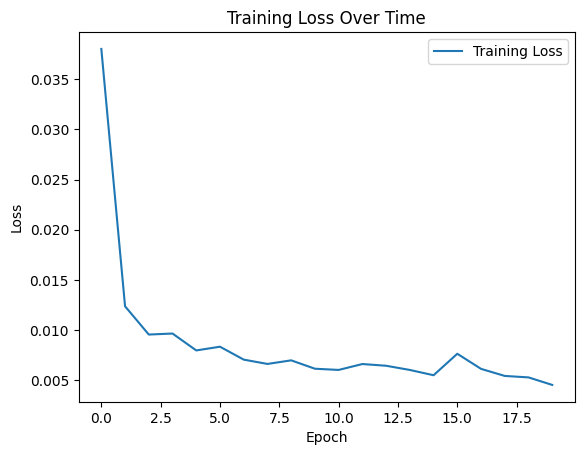

In [18]:
plt.plot(hist.history['loss'])
plt.title('Training Loss Over Time')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss'], loc='upper right')
plt.show()

In [19]:
# repeating the process for test data
test_data = pd.read_csv('Google_test_data.csv')
test_data["Close"]=pd.to_numeric(test_data.Close,errors='coerce')
test_data = test_data.dropna()
test_data = test_data.iloc[:,4:5]

y_test = test_data.iloc[60:,0:].values
inputClosing = test_data.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []

for i in range(60,len(test_data)):  
    X_test.append(inputClosing_scaled[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [22]:
y_prediction = model.predict(X_test)
print(y_prediction)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[1.239924 ]
 [1.2437072]
 [1.2552733]
 [1.272771 ]
 [1.2881687]
 [1.2911744]
 [1.280557 ]
 [1.2628955]
 [1.2491657]
 [1.243183 ]
 [1.2356155]
 [1.2245729]
 [1.2142243]
 [1.2046083]
 [1.2014585]
 [1.2050027]
 [1.2216394]
 [1.2495319]
 [1.2830501]
 [1.3174331]
 [1.3349692]
 [1.3353662]
 [1.3171653]
 [1.2876107]
 [1.2582651]
 [1.238716 ]
 [1.231097 ]
 [1.2290161]
 [1.2229317]
 [1.2135017]
 [1.2024221]
 [1.1894113]
 [1.1701449]
 [1.1458   ]
 [1.1333668]
 [1.1394547]
 [1.1594945]
 [1.1850902]
 [1.2109411]
 [1.2266393]
 [1.2406281]
 [1.2558705]
 [1.2730057]
 [1.2892933]
 [1.3009164]
 [1.3034585]
 [1.2946936]
 [1.2847682]
 [1.2799987]
 [1.2833539]
 [1.2947437]
 [1.3043795]
 [1.308685 ]
 [1.3073499]
 [1.3059524]
 [1.3024364]
 [1.2945489]
 [1.2895455]
 [1.2961656]
 [1.3126249]
 [1.3380593]
 [1.3698341]
 [1.394693 ]
 [1.4028212]
 [1.3940264]
 [1.3745363]
 [1.357788 ]
 [1.3493538]
 [1.3495138]
 [1.353624 ]
 [1.3592491]
 [1.3635496]
 [1.3617363]
 [1.3570874]


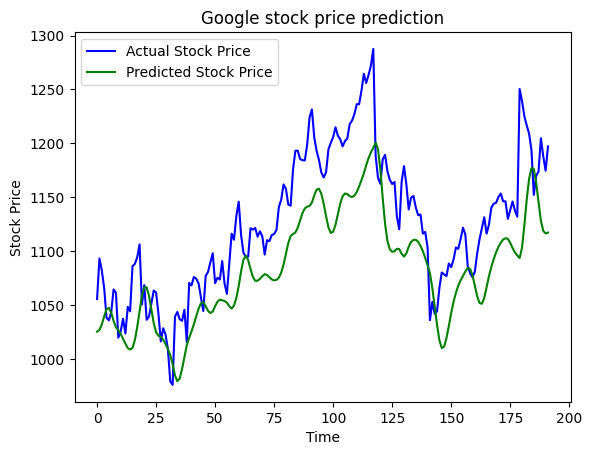

In [23]:
prediction = sc.inverse_transform(y_prediction)
plt.plot(y_test, color = 'Blue', label = 'Actual Stock Price')
plt.plot(prediction, color = 'Green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()